In [19]:
# Importing all relevant libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn import preprocessing, metrics, feature_selection, model_selection # Import key modules from sklearn
from sklearn.linear_model import LinearRegression # Import the Linear Models
from scipy.special import boxcox, inv_boxcox #For boxcox transformation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [20]:
# First, we read the data from the source using the read_csv function
('Data/train.csv')
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
# check the test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


It has somewhat similar dataset.
Data fields
Timeseries - datetime

Categorical - season, holiday, working day, weather, 

Numeric - temp,atemp, humidity, windspeed, casual, registered, count

In [22]:
# We look at a summary of the training dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


contains less number of dataset compared to train dataset and the response varialbe is not present on the test dataset. We will use the test data to predict the count value.

In [24]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# EDA
interpretation of the data
- Boxplot and histogram for count column
- Scatter the numeric columns with count columns
- Boxplot the categorical columns with count columns
- Correlation between each features

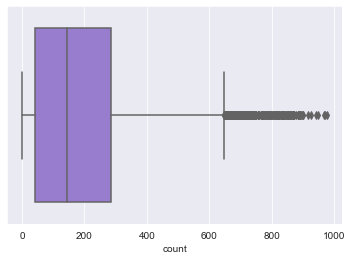

In [25]:
#Boxplot of count
sns.boxplot(x='count', data=train,color='mediumpurple')
plt.show()

From the boxplot of count column it is clear that most of the data lies between 30 and 200 and a huge number of outliers are present in the plot after 600.

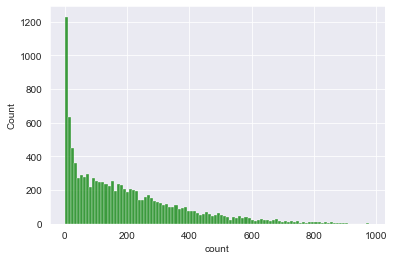

In [26]:
#Histogram plot of count
sns.set_style('darkgrid')
sns.histplot(train['count'],bins=100, color='green')
plt.show()

From the histogram plot, we can say that count data is skewed (concentrated on the one side) and the data is not equally distributed. we will remove this skewness later.

['temp', 'atemp', 'humidity', 'windspeed']


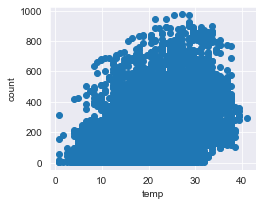

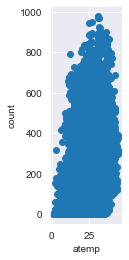

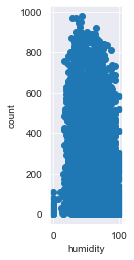

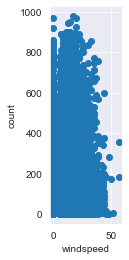

In [27]:
#Scatter plot between count and each numeric features
fields=[f for f in train]
fields=fields[5:-3]
print(fields)

fig=plt.figure(figsize=(17,3))

for i,f in enumerate(fields):
    ax=plt.subplot(1,4,i+1)
    ax.scatter(train[f],train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    
    plt.show()
    

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

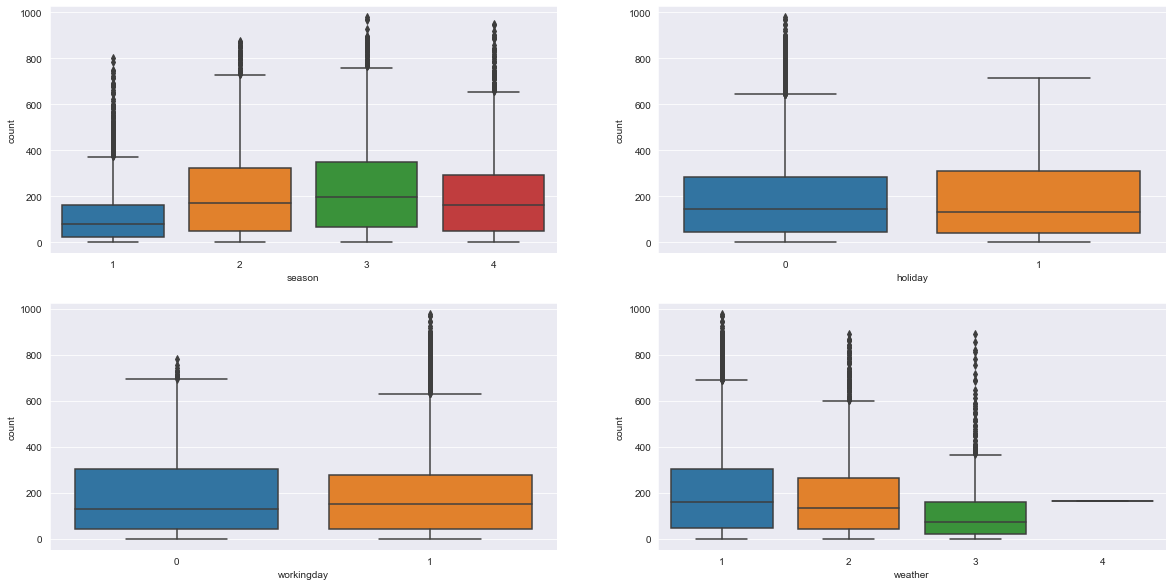

In [28]:
#Boxplot between count and each categorical features
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])

axes[0][0].set(xlabel='season',ylabel='count')
axes[0][1].set(xlabel='holiday',ylabel='count')
axes[1][0].set(xlabel='workingday',ylabel='count')
axes[1][1].set(xlabel='weather',ylabel='count')


<AxesSubplot:>

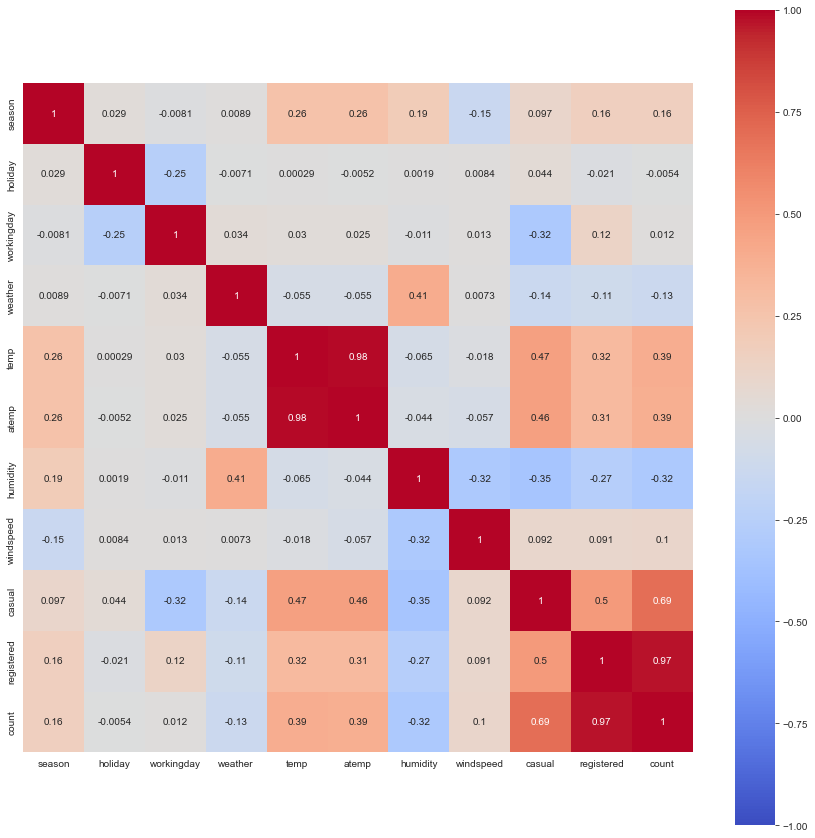

In [29]:
#correlation between each feature
plt.figure(figsize=(15,15))
sns.heatmap(train.corr('pearson'),vmin=-1,vmax=1,cmap='coolwarm',annot=True,square=True)

# 4 Data PreProcessing

-Split datetime column with converting datetime object
-take log for count column to mitigate skew
-  Eliminate outliers
- MinMax scaling the numeric columns
- Split data and train set

In [30]:
#convert datetime column to each element like year, month, day, dayof week, hour
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [31]:
def split_datetime(df):
    df['year']=df['datetime'].apply(lambda t:t.year)
    df['month']=df['datetime'].apply(lambda t:t.month)
    df['day']=df['datetime'].apply(lambda t:t.day)
    df['dayofweek']=df['datetime'].apply(lambda t:t.dayofweek)
    df['hour']=df['datetime'].apply(lambda t:t.hour)
    df=df.drop(['datetime'],axis=1)
    return df

In [32]:
train=split_datetime(train)
test=split_datetime(test)
train=train.drop(['casual','registered'],axis=1)
train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


In [33]:
# We inspect to confirm and verify the unique values for each column

for col in train:
    print(col)
    print(train[col].unique())
    print('\n')

season
[1 2 3 4]


holiday
[0 1]


workingday
[0 1]


weather
[1 2 3 4]


temp
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]


atemp
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]


humidity
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  9

In [34]:
# convert datetime column from object type to datetime type.
train["datetime"] = pd.to_datetime(train["datetime"])
train.dtypes

KeyError: 'datetime'

In [ ]:
# Next, we split datetime into separate year, month, day, hour and dayofweek columns

train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['dayofweek']= pd.to_datetime(train['datetime']).dt.dayofweek
    
train.info()
train.head()

In [ ]:
# Plot the correlation matrix using a heatmap

corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True);
fig.savefig("../img/clean-heatmap.eps",dpi=200, bbox_inches='tight')

From the heatmap, 'registered’ is highly correlated to ‘count’, 'season’ is highly correlated to ‘month’. In addition, we know that casual + registered = count. Hence we can drop columns ‘registered’, ‘casual’, and ‘season’.

In [ ]:
corrmat.drop(["season"],axis=0,inplace=True)
corrmat.drop(["season"],axis=1,inplace=True)
corrmat.drop(["casual"],axis=0,inplace=True)
corrmat.drop(["casual"],axis=1,inplace=True)
corrmat.drop(["registered"],axis=0,inplace=True)
corrmat.drop(["registered"],axis=1,inplace=True)

In [ ]:
# Let's now plot a "zoomed" correlation matrix, with respect to our response variable
fig, ax = plt.subplots(figsize=(10,10)) 
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'count').loc[:,'count'].index
cm = train.loc[:,cols].corr()
sns.set(font_scale=1)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
fig.savefig("../img/zoomed-heatmap.eps",dpi=200, bbox_inches='tight')

In [ ]:
Model     & RMSLE Score      \\
\midrule
  Random Forest Regression        & 0.376319   \\
  Bagging Regression              & 0.395248    \\
  GBRT                            & 0.430378   \\
  AdaBoost Regression             & 0.703528   \\ 
  Ridge Regression                & 1.045335   \\
  Lasso Regression                & 1.045453 \\
  ElasticNet Regression           & 1.045489 \\
  Linear Regression               & 1.046341 \\
  Logistic Regression             & 1.131105 \\